## Studies for different cuts


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from hipe4ml.model_handler import ModelHandler
from hipe4ml.tree_handler import TreeHandler

/home/fchinu/.virtualenv/ml/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /home/fchinu/.virtualenv/ml/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZNK3c1010TensorImpl36is_contiguous_nondefault_policy_implENS_12MemoryFormatE
  warn(f"Failed to load image Python extension: {e}")


In [3]:
df = pd.read_parquet("/home/fchinu/Run3/Ds_pp_13TeV/ML/Application/pt5_5.5/Data_pT_5_5.5_ModelApplied.parquet.gzip")
#df = df.query("0<fPt<2")

In [31]:
ModelHandl = ModelHandler()
ModelHandl.load_model_handler("/home/fchinu/Run3/Ds_pp_13TeV/ML/Training/pt2_2.5/ModelHandler_pT_2_2.5.pickle")
yPred = ModelHandl.predict(df, False)
df["ML_output_Bkg"] = yPred[:,0]
df["ML_output_Prompt"] = yPred[:,1]
df["ML_output_FD"] = yPred[:,2]

[15:47:30] WARNING: ../src/tree/./updater_quantile_hist.h:248: Attempted to load internal configuration for a model file that was generated by a previous version of XGBoost. A likely cause for this warning is that the model was saved with saveRDS() in R or pickle.dump() in Python. We strongly ADVISE AGAINST using saveRDS() or pickle.dump() so that the model remains accessible in current and upcoming XGBoost releases. Please use xgb.save() instead to preserve models for the long term. For more details and explanation, see https://xgboost.readthedocs.io/en/latest/tutorials/saving_model.html


<ErrorbarContainer object of 3 artists>

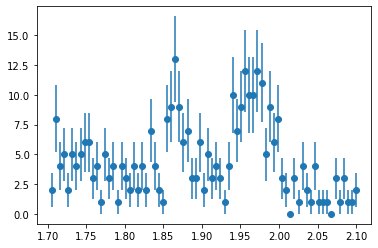

In [4]:
dfSel = df.query("ML_output_Prompt > 0.3 and ML_output_Bkg < 0.007")
counts,bin_edges = np.histogram(dfSel['fM'],bins=75, range=(1.7, 2.1))
plt.errorbar(x=bin_edges[1:], y=counts, yerr=np.sqrt(counts), fmt='o', label='Data')

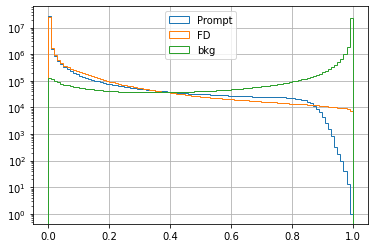

In [ ]:
df["ML_output_Prompt"].hist(bins=100, range=(0,1), histtype="step", label="Prompt")
df["ML_output_FD"].hist(bins=100, range=(0,1), histtype="step", label="FD")
df["ML_output_Bkg"].hist(bins=100, range=(0,1), histtype="step", label="bkg")
plt.yscale("log")
plt.legend(loc="upper center")


<ErrorbarContainer object of 3 artists>

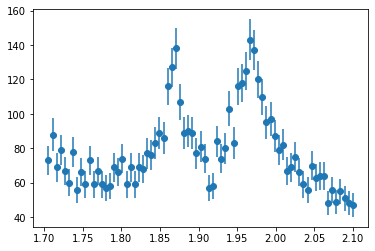

In [12]:
dfSel = df.query("ML_output_Prompt > 0.1 and ML_output_Bkg < 0.05")
counts,bin_edges = np.histogram(dfSel['fM'],bins=75, range=(1.7, 2.1))
plt.errorbar(x=bin_edges[1:], y=counts, yerr=np.sqrt(counts), fmt='o', label='Data')

<ErrorbarContainer object of 3 artists>

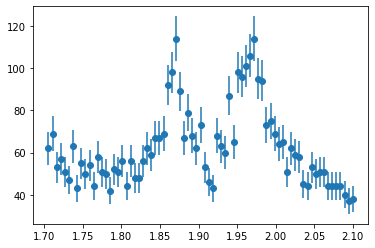

In [17]:
dfSel = df.query("ML_output_Prompt > 0.3 and ML_output_Bkg < 0.05")
counts,bin_edges = np.histogram(dfSel['fM'],bins=75, range=(1.7, 2.1))
plt.errorbar(x=bin_edges[1:], y=counts, yerr=np.sqrt(counts), fmt='o', label='Data')